# 랜덤 포레스트

랜덤 포레스트는 일반적으로 **배깅(또는 페이스팅)방법을 적용한 Decision Tree의 앙상블**이다.

랜덤 포레스트 알고리즘은 트리의 각 노드를 분할할 때, 전체 feature중에서 최선을 찾는 것이 아니라 **무작위로 선택한 subset에서 최선의 feature를 찾는 방식**으로 무작위성을 더욱 주입한다.

이는 트리를 더욱 다양하게 만들어주고, **편향이 증가하지만 분산을 낮추는 효과**를 가져오므로 더 훌륭한 모델을 만들게 된다.

사이킷런에서는 `RandomForestClassifier`(또는 `RandomForestRegressor`)를 사용하면 구현할 수 있으며, 훈련세트의 크기는 `max_samples`로 지정할 수 있다.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
# 랜덤 포레스트 예측기 훈련
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 n_jobs=-1,
                                 random_state=42)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [3]:
# BaggingClassifier로 위의 랜덤포레스트와 유사하게 훈련
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="auto", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)

bag_clf.fit(X_train, y_train)
y_pred_bf = bag_clf.predict(X_test)

In [4]:
# 두 결과 비교
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred_rf, y_test))
print(accuracy_score(y_pred_bf, y_test))

0.912
0.912


## 엑스트라 트리

랜덤 포레스트에서 트리를 더욱 무작위하게 만들기 위해, **각 feature에 대한 최선의 임계값 대신 무작위 임계값**을 사용할 수 있다. 이와 같이 극단적으로 무작위한 트리의 랜덤 포레스트를 익스트림 랜덤 트리(extremely randomized tree)앙상블 또는 엑스트라 트리(extra-tree)라고 한다.

엑스트라 트리는 랜덤포레스트와 마찬가지로 **편향이 늘어나지만 분산을 낮추는 효과**가 있다. 또한, 최적의 임계값을 찾는 것은 시간이 많이 소요되는 작업이므로, 엑스트라 트리가 일반적인 랜덤포레스트보다 **더욱 속도가 빠르다.** (실제로는 두 모델을 시도해보고 검증을 통해 비교해보는것이 좋음)

사이킷런에서는 `ExtraTreesClassifier`와 `ExtraTreesRegressor`를 사용한다.(단일 트리에 사용할 경우, `ExtraTreeClassifier`와 `ExtraTreeRegressor`)

이는 `RandomForestClassifier`와 `RandomForestRegressor`와 같은 API를 제공한다.

## 특성 중요도 (Feature Importance)

랜덤 포레스트는 feature들의 상대적 중요도를 측정할 수 있다는 장점이 있다.

트리의 root에 가깝게 위치할수록 중요한 feature인 경향이 있으므로, 랜덤 포레스트의 모든 트리에 걸친 average depth를 통해 feature의 중요도를 계산할 수 있다.

사이킷런은 훈련이 끝난 뒤, feature의 중요도를 측정하고, 전체 합이 1이 되도록 스케일링한 결과를 제공한다.

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10283960515821881
sepal width (cm) 0.02441339350381113
petal length (cm) 0.4073544917567797
petal width (cm) 0.4653925095811902


MNIST에서 각 픽셀의 중요도를 그리면 다음과 같다.

In [6]:
import os
import numpy as np
from sklearn.datasets import fetch_openml

dataset_root = os.path.join(os.getcwd(), 'datasets')
if not os.path.isdir(dataset_root):
    os.mkdir(dataset_root)
    
mnist = fetch_openml('mnist_784', version=1, data_home=dataset_root)
mnist.target = mnist.target.astype(np.uint8)

In [7]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [8]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

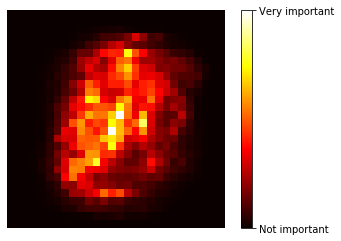

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()